In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df.drop(columns=['RefId',
        'PurchDate',
        'IsBadBuy',
        'Auction',
        'Make',
        'Model',
        'WheelTypeID',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'BYRNO',
        'TopThreeAmericanName',
        'SubModel',
        'VehicleAge',
        'IsOnlineSale',
        'Region',
        'IsBase',])
df_clus.dropna(inplace=True)

In [0]:
df_1 = df_clus[['AuctionAVG', 'RetailAVG', 'VehBCost']]
df_2 = df_clus[['WarrantyCost', 'Trend', 'VehBCost']]
df_3 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]

In [0]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [0]:
df_h = df_1[0:5000]

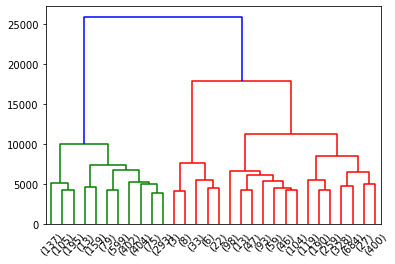

In [8]:
data_dist = pdist(df_h, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=25000, truncate_mode='lastp')